<a href="https://colab.research.google.com/github/asha-murthy/DataScientist/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delhivery - Case Study

#  Problem Statement

**The company wants to understand and process the data coming out of data engineering pipelines:**

- Clean, sanitize and manipulate data to get useful features out of raw fields

- Make sense out of the raw data and help the data science team to build forecasting models on it

# Installing Packages

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats

# Loading Dataset

In [90]:
delhivery = pd.read_csv("delhivery.csv")

delhivery.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# Understanding Shape and Structure of Data

In [91]:
delhivery.shape

(144867, 24)

**There are `144867 rows` and `24 columns`**

In [92]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# Missing Values Detection

In [93]:
delhivery.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


- **`source_name` and `destination_name` contain missing values**

# Change data type of feature

In [94]:
delhivery["trip_creation_time"] = pd.to_datetime(delhivery["trip_creation_time"])
delhivery["od_start_time"] = pd.to_datetime(delhivery["od_start_time"])
delhivery["od_end_time"] = pd.to_datetime(delhivery["od_end_time"])

# Range of Datapoint available acc. `trip_creation_time`

In [95]:
delhivery["trip_creation_time"].dt.month_name().value_counts()

,count
trip_creation_time,
September,127349
October,17518


In [96]:
delhivery["trip_creation_time"].dt.year.value_counts()

,count
trip_creation_time,
2018,144867


In [97]:
delhivery["trip_creation_time"].dt.day_name().value_counts()

,count
trip_creation_time,
Wednesday,26732
Thursday,20481
Friday,20242
Tuesday,19961
Saturday,19936
Monday,19645
Sunday,17870


- **`Datepoints are from the month of September and October of year 2018`**

# No. of Unique Categories of Features

In [98]:
delhivery.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


- **`There are total 14817 different trips of data available`**
- **`There are 1508 unique source_center`**
- **`There are 1481 unique destination_center`**
- **`There are total 1504 delivery routes`**

# Visual Analysis

# Univariate Continuous

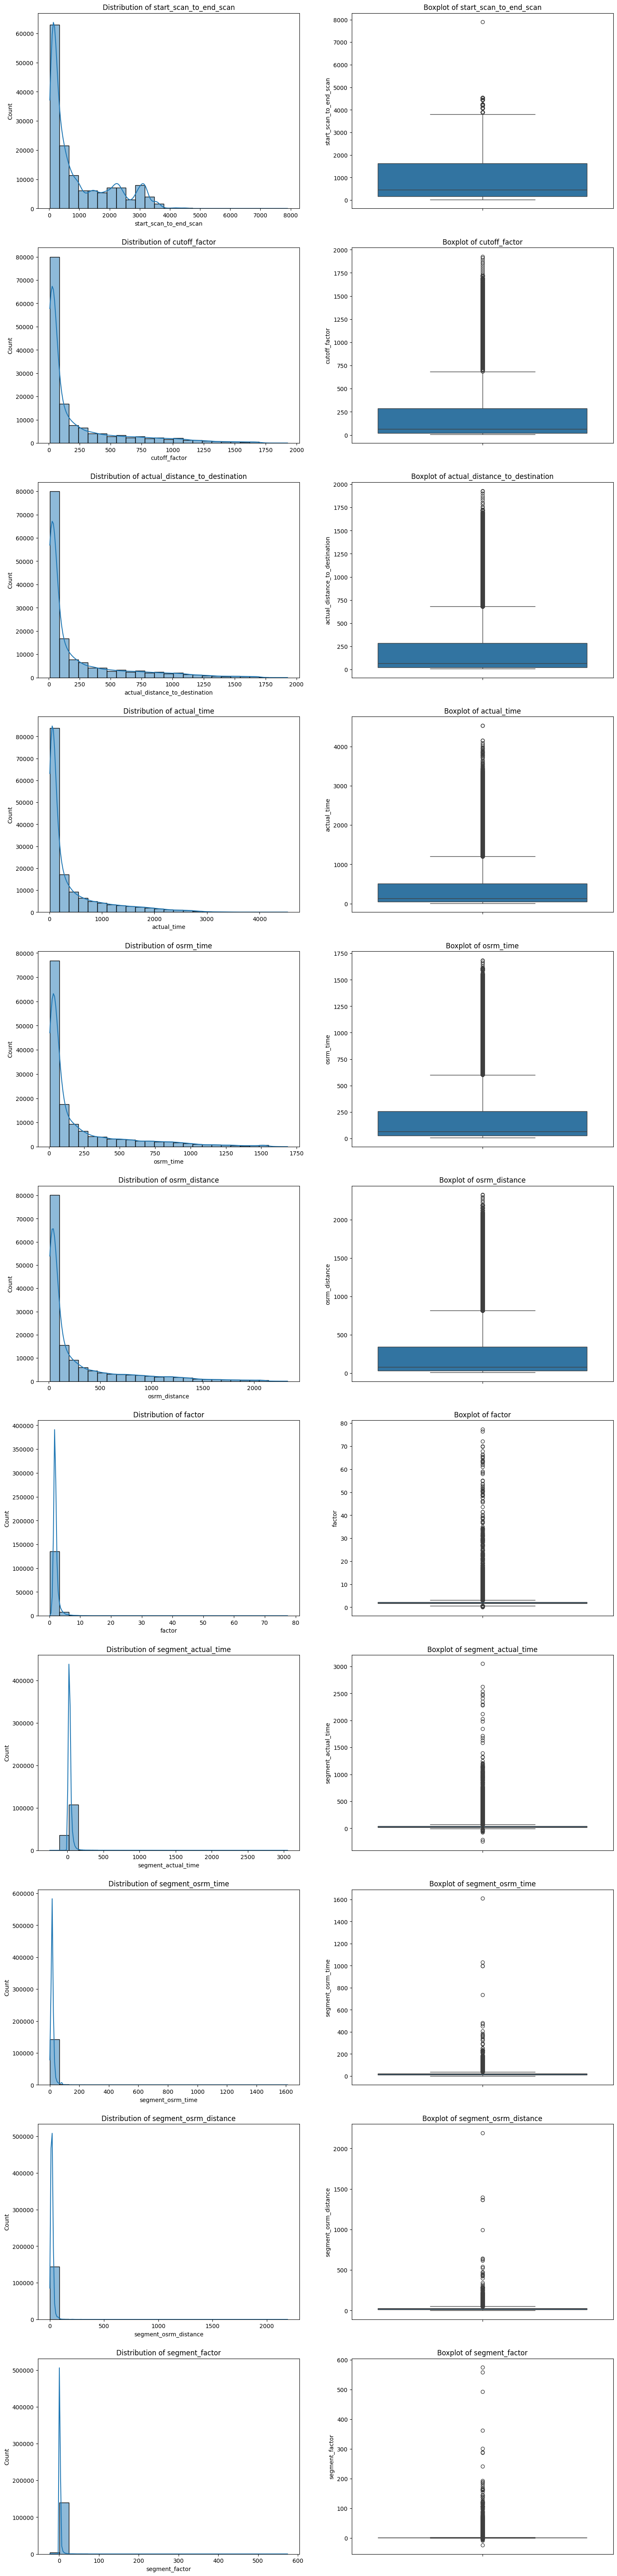

In [99]:
num_vars = delhivery.select_dtypes(include=np.number).columns.tolist()

fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(18, 80))

for i in range(len(num_vars)):

    sns.histplot(x=delhivery[num_vars[i]], kde=True, bins = 25, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {num_vars[i]}")

    sns.boxplot(y = delhivery[num_vars[i]], ax=ax[i, 1], data=delhivery)
    ax[i, 1].set_title(f"Boxplot of {num_vars[i]}")

plt.show()

# Feature Creation.

# Extracting Features like city - place - pin code -state from source and destination name columns :

In [100]:
delhivery["source_city"] = delhivery["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
delhivery["source_state"] = delhivery["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

delhivery["destination_city"] = delhivery["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
delhivery["destination_state"] = delhivery["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

delhivery["source_pincode"] = delhivery["source_center"].apply(lambda x : x[3:9] )
delhivery["destination_pincode"] = delhivery["destination_center"].apply(lambda x : x[3:9] )

# Time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan :

In [101]:
delhivery["time_taken_btwn_odstart_and_od_end"] = ((delhivery["od_end_time"]-delhivery["od_start_time"])/pd.Timedelta(1,unit="hour"))

# Converting given time duration features into hours .

In [102]:
delhivery["start_scan_to_end_scan"] = delhivery["start_scan_to_end_scan"]/60
delhivery["actual_time"] = delhivery["actual_time"]/60
delhivery["osrm_time"] = delhivery["osrm_time"]/60
delhivery["segment_actual_time"] = delhivery["segment_actual_time"]/60
delhivery["segment_osrm_time"] = delhivery["segment_osrm_time"]/60

In [103]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.183333,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.150000,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.116667,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.200000,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.083333,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894


# Analysing Dataset after feature creation

In [104]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144574 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144606 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

# Data Cleaning

In [105]:
delhivery["source_state"] = delhivery["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })

delhivery["destination_state"] = delhivery["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [106]:
delhivery["destination_city"].replace({
    "del":"Delhi"
},inplace=True)
delhivery["source_city"].replace({
    "del":"Delhi"
},inplace=True)

delhivery["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
delhivery["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
delhivery["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
delhivery["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)
delhivery["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
delhivery["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)

# Creating Feature - (Source city + state & Destination city + state)

In [107]:
delhivery["source_city_state"] = delhivery["source_city"] + " " + delhivery["source_state"]
delhivery["destination_city_state"] = delhivery["destination_city"] + " " + delhivery["destination_state"]

In [108]:
delhivery["source_city_state"].nunique()

1249

In [109]:
delhivery["destination_city_state"].nunique()

1242

In [110]:
delhivery["source_state"].nunique()

33

In [111]:
delhivery["destination_state"].nunique()

32

- **`Company delivers in approximately all the states and cities of India`**

# Dropping Unnecessary columns

In [112]:
data = delhivery.copy()

In [113]:
data.shape

(144867, 33)

In [114]:
data.drop(
    ['source_center',"source_name","destination_center","destination_name","cutoff_timestamp", "od_end_time","od_start_time"],
    axis = 1,
    inplace=True
)

In [115]:
data.shape

(144867, 26)

# 3. Merging of rows and aggregation of fields

In [116]:
actual_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()

actual_time

,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333
...,...,...
14812,trip-153861095625827784,1.383333
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.700000
14815,trip-153861115439069069,4.400000


In [117]:
segment_osrm_time = data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_osrm_time

,trip_uuid,segment_osrm_time
0,trip-153671041653548748,16.800000
1,trip-153671042288605164,1.083333
2,trip-153671043369099517,32.350000
3,trip-153671046011330457,0.266667
4,trip-153671052974046625,1.916667
...,...,...
14812,trip-153861095625827784,1.033333
14813,trip-153861104386292051,0.183333
14814,trip-153861106442901555,1.466667
14815,trip-153861115439069069,3.683333


In [118]:
segment_actual_time = data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
segment_actual_time

,trip_uuid,segment_actual_time
0,trip-153671041653548748,25.800000
1,trip-153671042288605164,2.350000
2,trip-153671043369099517,55.133333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.666667
...,...,...
14812,trip-153861095625827784,1.366667
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.683333
14815,trip-153861115439069069,4.300000


In [119]:
osrm_time = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
osrm_time

,trip_uuid,osrm_time
0,trip-153671041653548748,12.383333
1,trip-153671042288605164,1.133333
2,trip-153671043369099517,29.016667
3,trip-153671046011330457,0.250000
4,trip-153671052974046625,1.950000
...,...,...
14812,trip-153861095625827784,1.033333
14813,trip-153861104386292051,0.200000
14814,trip-153861106442901555,0.900000
14815,trip-153861115439069069,3.066667


In [120]:
time_taken_btwn_odstart_and_od_end = data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()
time_taken_btwn_odstart_and_od_end

,trip_uuid,time_taken_btwn_odstart_and_od_end
0,trip-153671041653548748,"[16.65842298, 21.0100736875]"
1,trip-153671042288605164,"[2.0463247669444447, 0.9805397955555556]"
2,trip-153671043369099517,"[51.662059856388886, 13.910648811388889]"
3,trip-153671046011330457,[1.6749155866666667]
4,trip-153671052974046625,"[2.5335485744444446, 1.3423885633333332, 8.096..."
...,...,...
14812,trip-153861095625827784,"[2.546464057777778, 1.7540180775]"
14813,trip-153861104386292051,[1.0098420219444444]
14814,trip-153861106442901555,"[2.895179575833333, 4.1401515375]"
14815,trip-153861115439069069,"[1.7609491794444445, 0.7362400538888889, 1.035..."


In [121]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]

,time_taken_btwn_odstart_and_od_end
0,37.668497
1,3.026865
2,65.572709
3,1.674916
4,11.972484
...,...
14812,4.300482
14813,1.009842
14814,7.035331
14815,5.808548


In [122]:
start_scan_to_end_scan = ((data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,"[16.65, 21.0]"
1,trip-153671042288605164,"[2.033333333333333, 0.9666666666666667]"
2,trip-153671043369099517,"[51.65, 13.9]"
3,trip-153671046011330457,[1.6666666666666667]
4,trip-153671052974046625,"[2.533333333333333, 1.3333333333333333, 8.0833..."
...,...,...
14812,trip-153861095625827784,"[2.533333333333333, 1.75]"
14813,trip-153861104386292051,[1.0]
14814,trip-153861106442901555,"[2.8833333333333333, 4.133333333333334]"
14815,trip-153861115439069069,"[1.75, 0.7333333333333333, 1.0333333333333334,..."


In [123]:
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum)
start_scan_to_end_scan["start_scan_to_end_scan"]

,start_scan_to_end_scan
0,37.650000
1,3.000000
2,65.550000
3,1.666667
4,11.950000
...,...
14812,4.283333
14813,1.000000
14814,7.016667
14815,5.783333


In [124]:
osrm_distance = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()

osrm_distance

,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2372.0852
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14812,trip-153861095625827784,73.4630
14813,trip-153861104386292051,16.0882
14814,trip-153861106442901555,63.2841
14815,trip-153861115439069069,177.6635


In [125]:
actual_distance_to_destination = data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()

actual_distance_to_destination

,trip_uuid,actual_distance_to_destination
0,trip-153671041653548748,824.732854
1,trip-153671042288605164,73.186911
2,trip-153671043369099517,1932.273969
3,trip-153671046011330457,17.175274
4,trip-153671052974046625,127.448500
...,...,...
14812,trip-153861095625827784,57.762332
14813,trip-153861104386292051,15.513784
14814,trip-153861106442901555,38.684839
14815,trip-153861115439069069,134.723836


In [126]:
segment_osrm_distance = data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()

segment_osrm_distance

,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14812,trip-153861095625827784,64.8551
14813,trip-153861104386292051,16.0883
14814,trip-153861106442901555,104.8866
14815,trip-153861115439069069,223.5324


# Hypothesis Test

## 1. Analysing TimeTaken Between OdStart and OdEnd time & StartScanToEndScan :

**`H0: Mean of time taken betweenn trip end ans start time = Mean of start and end scan time`**<br>
**`Ha: Mean of time taken betweenn trip end ans start time != Mean of start and end scan time`**

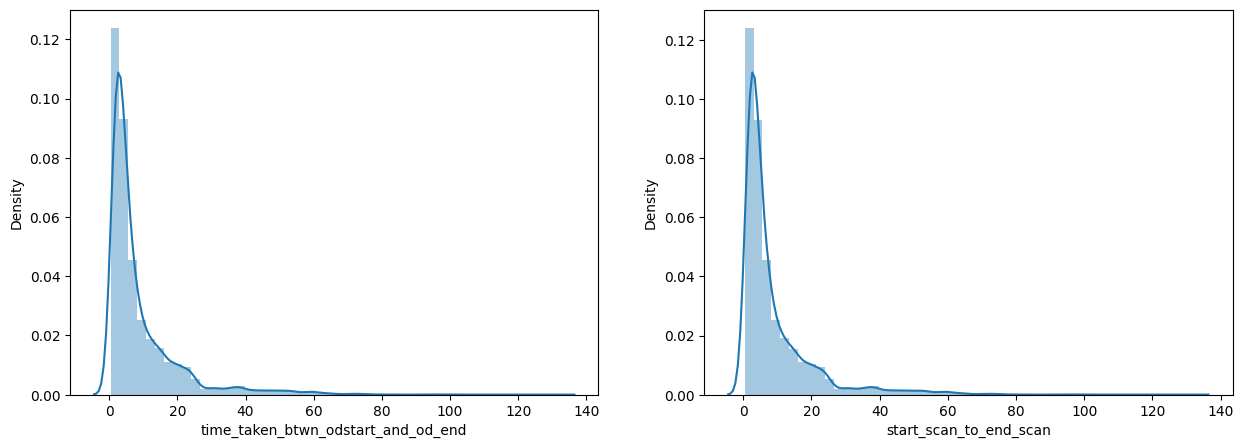

In [127]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [128]:
# KS Test to check the similarity of distribution of these two.

In [129]:
ks_test, p_value = stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]
               ,start_scan_to_end_scan["start_scan_to_end_scan"])

In [130]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: The distribution are different.")
else :
    print("Fail to reject Ho: The distribution is same.")

Fail to reject Ho: The distribution is same.


In [131]:
for i in range(5):
    print(stats.ttest_ind((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000))))

TtestResult(statistic=np.float64(1.7183834626167152), pvalue=np.float64(0.08577830077517071), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.08473386857846728), pvalue=np.float64(0.9324757974869682), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.1599243563512877), pvalue=np.float64(0.8729460469487209), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.40163296217398475), pvalue=np.float64(0.6879684767267311), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.14690664006690654), pvalue=np.float64(0.8832106481095132), df=np.float64(5998.0))


- **`from 2 sample t-test ,we can also conclude that Average time_taken_btwn_odstart_and_od_end for population is also equal to Average start_scan_to_end_scan for population.`**

In [132]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean(),time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].std()

(np.float64(8.861857235305113), 10.981665759990623)

In [133]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(np.float64(8.835777597804324), 10.97628639143973)

- **`variance and means both are closly similar for scan time and trip start and end time taken `**

## 2. Analysing Actual Time taken to complete the delivery & start-scan-end-scan

**`H0: Mean of start and end scan time <= Mean of Actual time taken to complete delivery`** <br>
**`Ha: Mean of start and end scan time > Mean of Actual time taken to complete delivery`**

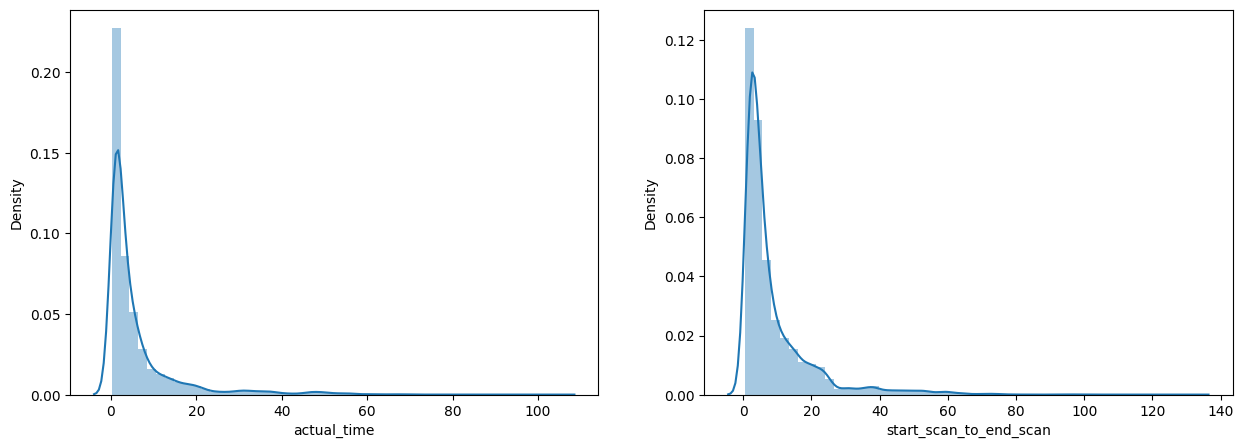

In [134]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [135]:
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=np.float64(0.27387460349598436), pvalue=np.float64(0.0), statistic_location=np.float64(1.8499999999999999), statistic_sign=np.int8(1))

In [136]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less"))

TtestResult(statistic=np.float64(-12.131963893256524), pvalue=np.float64(8.79927829455026e-34), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-9.560018912283505), pvalue=np.float64(8.371923057237772e-22), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-9.694519187900791), pvalue=np.float64(2.3076892114138374e-22), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-12.258112490917428), pvalue=np.float64(1.9416638748578414e-34), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-10.900211547088222), pvalue=np.float64(1.0377316507482415e-27), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-12.637687950581569), pvalue=np.float64(1.8841295721681172e-36), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-11.329445805044822), pvalue=np.float64(9.327814502213674e-30), df=np.float64(5998.0))


In [137]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(np.float64(5.945176711435065), 9.35554782297388)

In [138]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(np.float64(8.835777597804324), 10.97628639143973)

## Analysing Actual Time & TimeTaken between start and end trip time.

**`H0: Mean of Actual time taken to complete delivery = Mean of time taken betweenn trip end and start time`**<br>
**`Ha: Mean of Actual time taken to complete delivery != Mean of time taken betweenn trip end and start time`**

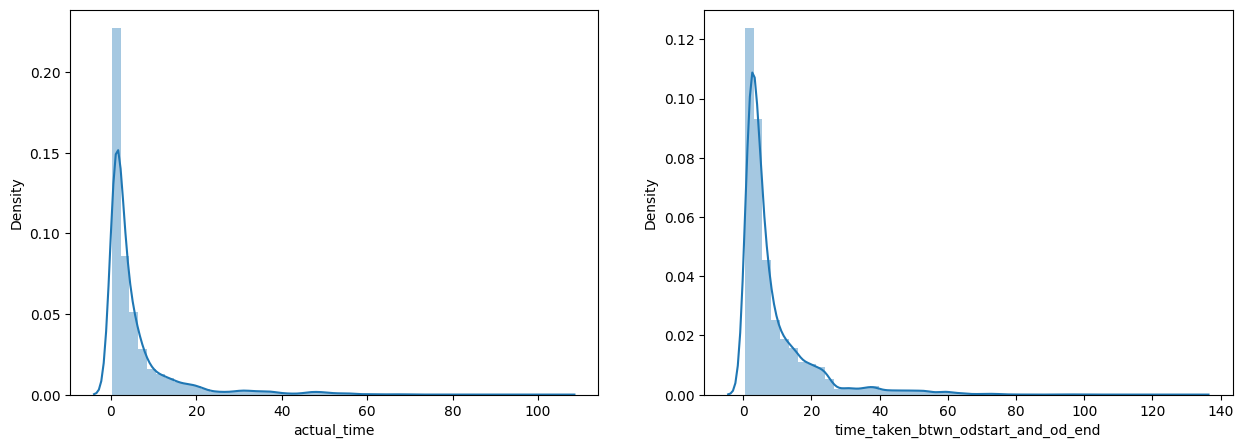

In [139]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))

plt.show()

In [140]:
stats.ks_2samp(actual_time["actual_time"],time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

KstestResult(statistic=np.float64(0.2765067152594992), pvalue=np.float64(0.0), statistic_location=np.float64(1.8333333333333335), statistic_sign=np.int8(1))

In [141]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000))
                ,(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))))

TtestResult(statistic=np.float64(-7.883961911016747), pvalue=np.float64(5.17100107672068e-15), df=np.float64(1998.0))
TtestResult(statistic=np.float64(-4.702551439620404), pvalue=np.float64(2.7450230860685488e-06), df=np.float64(1998.0))
TtestResult(statistic=np.float64(-7.681923832400149), pvalue=np.float64(2.4377078179697164e-14), df=np.float64(1998.0))
TtestResult(statistic=np.float64(-7.0295363024131765), pvalue=np.float64(2.8329143368783047e-12), df=np.float64(1998.0))
TtestResult(statistic=np.float64(-5.670780383999422), pvalue=np.float64(1.62841690224726e-08), df=np.float64(1998.0))


- **`from above kstest of distribution and two sample ttest ,`**
**`we can conclude that population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.`**

## Analysing Actual Time taken to complete delivery from source to destination hub & OSRM measured time :

**`H0: Mean of OSRM time >= Mean of Actual time taken to complete delivery`**<br>
**`Ha: Mean of OSRM time < Mean of Actual time taken to complete delivery`**

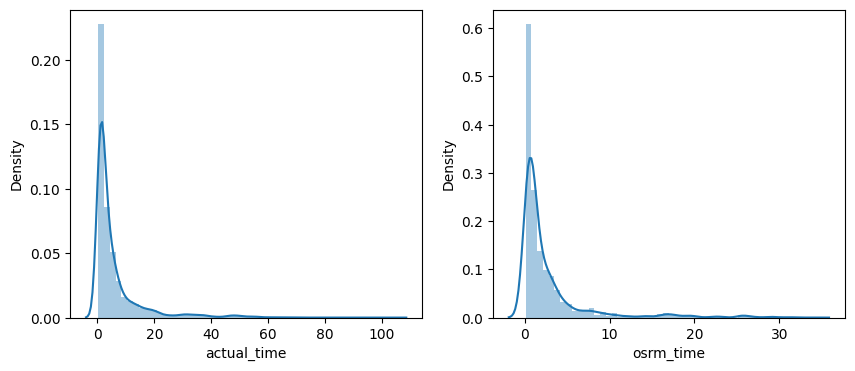

In [142]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

plt.show()

In [143]:
stats.ks_2samp(actual_time["actual_time"],
               osrm_time["osrm_time"])

KstestResult(statistic=np.float64(0.2945265573327934), pvalue=np.float64(0.0), statistic_location=np.float64(0.6833333333333333), statistic_sign=np.int8(-1))

In [144]:
for i in range(5):
    print(stats.ttest_ind(actual_time["actual_time"].sample(5000),
               osrm_time["osrm_time"].sample(5000),alternative='greater'))

TtestResult(statistic=np.float64(22.603330871815547), pvalue=np.float64(1.1363953709236349e-110), df=np.float64(9998.0))
TtestResult(statistic=np.float64(22.17723529544873), pvalue=np.float64(1.0206034348630692e-106), df=np.float64(9998.0))
TtestResult(statistic=np.float64(22.033865729607484), pvalue=np.float64(2.1075943648251236e-105), df=np.float64(9998.0))
TtestResult(statistic=np.float64(22.65529843292104), pvalue=np.float64(3.704612161589803e-111), df=np.float64(9998.0))
TtestResult(statistic=np.float64(22.891404555035308), pvalue=np.float64(2.2103983649323623e-113), df=np.float64(9998.0))


- **`from two sample ttest can conclude , that population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same.`**<br><br>
- **`actual time is higher than the osrm estimated time for delivery.`**

In [145]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(np.float64(5.945176711435065), 9.35554782297388)

In [146]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(np.float64(2.6973138962003107), 4.537654251845703)

## Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :

**`H0: Actual time = segment actual time`**<br>
**`Ha: Actual time != segment actual time`**

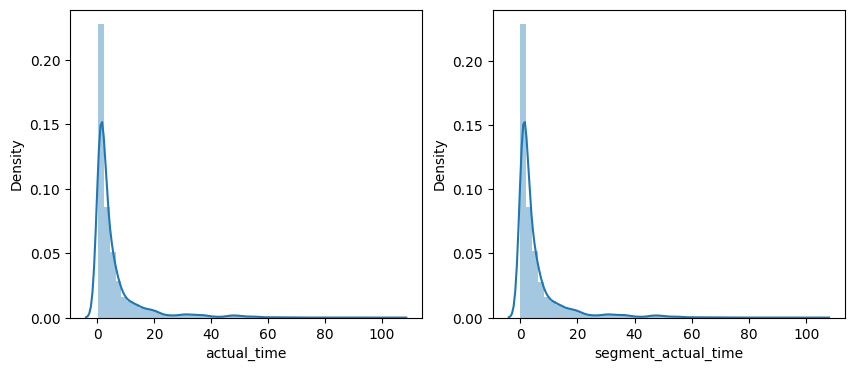

In [147]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

plt.show()

In [148]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000)),
                (segment_actual_time["segment_actual_time"].sample(3000))))

TtestResult(statistic=np.float64(0.31133234638040463), pvalue=np.float64(0.7555587992314077), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.42484098513625806), pvalue=np.float64(0.6709678369918373), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.6106138749677308), pvalue=np.float64(0.5414783708739593), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-0.4087621884794755), pvalue=np.float64(0.6827287842329512), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.11498637426558402), pvalue=np.float64(0.9084597711317235), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-1.2881064123937296), pvalue=np.float64(0.19775861309213352), df=np.float64(5998.0))
TtestResult(statistic=np.float64(0.8608483370986075), pvalue=np.float64(0.3893559882616855), df=np.float64(5998.0))


**`from two sample ttest , we can conclude that`**
- Population average for
- Actual Time taken to complete delivery trip and segment actual time are same.

In [149]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(np.float64(5.945176711435065), 9.35554782297388)

In [150]:
segment_actual_time["segment_actual_time"].mean(),segment_actual_time["segment_actual_time"].std()

(np.float64(5.8982047647971925), 9.270799413152762)

## Analysing osrm Time & segment-osrm-time :

**`Ho: segment actual time <= OSRM time`**<br>
**`Ha: segment actual time > OSRM time`**

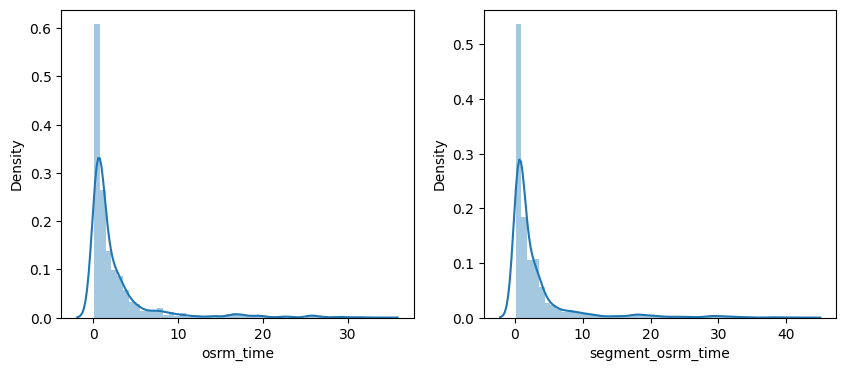

In [151]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_time["osrm_time"])))
plt.subplot(122)
sns.distplot(((segment_osrm_time["segment_osrm_time"])))

plt.show()

In [152]:
for i in range(7):
    print(stats.ttest_ind((osrm_time["osrm_time"].sample(3000)),
                (segment_osrm_time["segment_osrm_time"].sample(3000)),alternative ="less"))

TtestResult(statistic=np.float64(-2.7531669590100196), pvalue=np.float64(0.0029599712225229185), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-2.316945989180356), pvalue=np.float64(0.01027009384862407), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-0.7549259632749549), pvalue=np.float64(0.2251615234293397), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-2.4414755701736737), pvalue=np.float64(0.007328041786918825), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-2.748971503416465), pvalue=np.float64(0.0029980762342678674), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-3.0319929640397683), pvalue=np.float64(0.0012199140356948849), df=np.float64(5998.0))
TtestResult(statistic=np.float64(-3.4315034999713596), pvalue=np.float64(0.0003021487551918231), df=np.float64(5998.0))


**`from ttest , we can conclude that`**
- average of osrm Time & segment-osrm-time for population is not same.
- Population Mean osrm time is less than Population Mean segment osrm time.

In [153]:
osrm_time["osrm_time"].mean(),osrm_time["osrm_time"].std()

(np.float64(2.6973138962003107), 4.537654251845703)

In [154]:
segment_osrm_time["segment_osrm_time"].mean(),segment_osrm_time["segment_osrm_time"].std()

(np.float64(3.0158297901059594), 5.242367441693007)

## Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance :

**`H0 : Segment OSRM distnace <= OSRM distnace`**<br>
**`Ha : Segment OSRM distnace > OSRM distnace`**

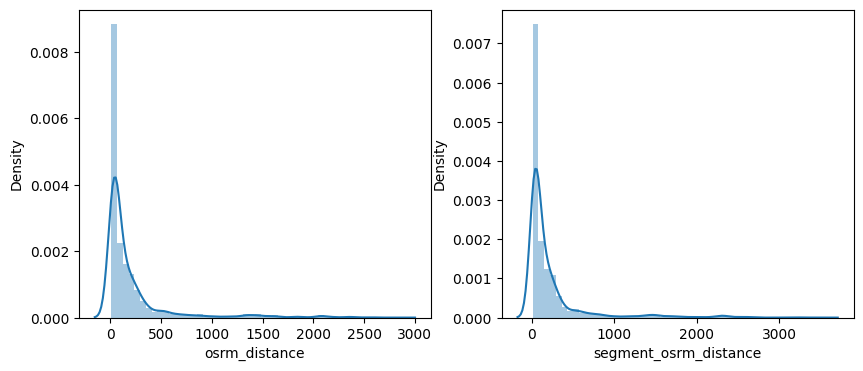

In [155]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

plt.show()

In [156]:
stats.ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])

KstestResult(statistic=np.float64(0.03948167645272321), pvalue=np.float64(1.8042208791084262e-10), statistic_location=np.float64(50.2941), statistic_sign=np.int8(1))

In [157]:
for i in range(7):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               segment_osrm_distance["segment_osrm_distance"].sample(5000),alternative="less"))

TtestResult(statistic=np.float64(-1.3551721628515283), pvalue=np.float64(0.08769666356143971), df=np.float64(9998.0))
TtestResult(statistic=np.float64(-2.6103882775221896), pvalue=np.float64(0.004528720505361165), df=np.float64(9998.0))
TtestResult(statistic=np.float64(-1.8850662110163174), pvalue=np.float64(0.029724936965110336), df=np.float64(9998.0))
TtestResult(statistic=np.float64(-1.7684853338963176), pvalue=np.float64(0.03850514481030332), df=np.float64(9998.0))
TtestResult(statistic=np.float64(-2.1923249753644094), pvalue=np.float64(0.014189509333470528), df=np.float64(9998.0))
TtestResult(statistic=np.float64(-2.766264107931209), pvalue=np.float64(0.0028403353678066825), df=np.float64(9998.0))
TtestResult(statistic=np.float64(-1.0757080845879785), pvalue=np.float64(0.1410418939271663), df=np.float64(9998.0))


In [158]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(np.float64(204.83672531551593), 370.74927471335496)

In [159]:
segment_osrm_distance["segment_osrm_distance"].mean(),segment_osrm_distance["segment_osrm_distance"].std()

(np.float64(223.20116128771005), 416.6283742907418)

- **`from KS test , we can conclude the distributions of segment osrm distance and osrm distnace are not same!`**
- **`from two sample one sided ttest, we can conclude: Average of osrm distance for population is less than average of segment osrm distnace`**

## Analysing and Visulizing OSRM Estimated distance and Actual Distance between source and destination warehouse :

**`H0 : Mean OSRM distance <= Mean Actual distnace`**<br>
**`Ha : Mean OSRM distance > Mean Actual distnace`**

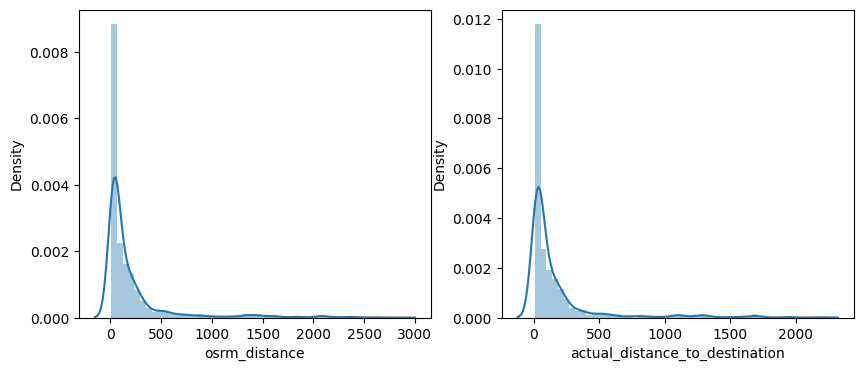

In [160]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((actual_distance_to_destination["actual_distance_to_destination"])))

plt.show()

In [161]:
stats.ks_2samp(osrm_distance["osrm_distance"],actual_distance_to_destination["actual_distance_to_destination"])

KstestResult(statistic=np.float64(0.11837753931295136), pvalue=np.float64(6.578385372142345e-91), statistic_location=np.float64(25.247485296255537), statistic_sign=np.int8(-1))

In [162]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               actual_distance_to_destination["actual_distance_to_destination"].sample(5000),alternative="greater"))

TtestResult(statistic=np.float64(6.025998345729032), pvalue=np.float64(8.700027590177977e-10), df=np.float64(9998.0))
TtestResult(statistic=np.float64(5.217755641787486), pvalue=np.float64(9.236662639436138e-08), df=np.float64(9998.0))
TtestResult(statistic=np.float64(7.383389258231041), pvalue=np.float64(8.330887092735189e-14), df=np.float64(9998.0))
TtestResult(statistic=np.float64(4.007395387085823), pvalue=np.float64(3.0918689450463034e-05), df=np.float64(9998.0))
TtestResult(statistic=np.float64(3.2291783011242794), pvalue=np.float64(0.0006227371310890227), df=np.float64(9998.0))


**`From left sided ttest , we can conclude`**
- for population OSRM estimated distance is higher than the actual distance from source to destination warehouse.

In [163]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(np.float64(204.83672531551593), 370.74927471335496)

In [164]:
actual_distance_to_destination["actual_distance_to_destination"].mean(),actual_distance_to_destination["actual_distance_to_destination"].std()

(np.float64(164.47332174544243), 305.5408288910492)

# Merging

In [165]:
distances = segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,
                                                                             on="trip_uuid"),
                                                                            on="trip_uuid")

In [166]:
distances

,trip_uuid,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,1320.4733,824.732854,991.3523
1,trip-153671042288605164,84.1894,73.186911,85.1110
2,trip-153671043369099517,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,19.8766,17.175274,19.6800
4,trip-153671052974046625,146.7919,127.448500,146.7918
...,...,...,...,...
14812,trip-153861095625827784,64.8551,57.762332,73.4630
14813,trip-153861104386292051,16.0883,15.513784,16.0882
14814,trip-153861106442901555,104.8866,38.684839,63.2841
14815,trip-153861115439069069,223.5324,134.723836,177.6635


In [167]:
time = segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(time_taken_btwn_odstart_and_od_end.merge(start_scan_to_end_scan,
                                         on="trip_uuid",
                                         ),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

time

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000
...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333


In [168]:
Merge1 = time.merge(distances,on="trip_uuid",
                                        )
Merge1

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918
...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630
14813,trip-153861104386292051,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882
14814,trip-153861106442901555,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841
14815,trip-153861115439069069,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635


## Merging Location details and route_type and Numerical data on TripID :

In [169]:
city = data.groupby("trip_uuid")[["source_city",
                                  "destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

state = data.groupby("trip_uuid")[["source_state",
                                   "destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

city_state = data.groupby("trip_uuid")[["source_city_state",
                                        "destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

In [170]:
route_type = data.groupby("trip_uuid")["route_type"].unique().reset_index()

Merged = route_type.merge(locations.merge(Merge1,on="trip_uuid",
           how="outer"),
                 on="trip_uuid",
           how="outer"
                )

In [171]:
trip_records = Merged.copy()

In [172]:
trip_records["route_type"] = trip_records["route_type"].apply(lambda x:x[0])
route_to_merge = data.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()
trip_records = trip_records.merge(route_to_merge,on="trip_uuid",how="outer")
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka],1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,FTL,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,Carting,[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra],0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka],1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,[Chandigarh],"[Zirakpur, Chandigarh]","[Chandigarh Punjab, Chandigarh Chandigarh]","[Zirakpur Punjab, Chandigarh Punjab]","[Punjab, Chandigarh]",[Punjab],1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,[FBD],[Faridabad],[FBD Haryana],[Faridabad Haryana],[Haryana],[Haryana],0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,[Kanpur],[Kanpur],[Kanpur Uttar Pradesh],[Kanpur Uttar Pradesh],[Uttar Pradesh],[Uttar Pradesh],1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,"[Tirunelveli, Eral, Tirchchndr, Thisayanvilai,...","[Eral, Tirchchndr, Thisayanvilai, Peikulam, Ti...","[Tirunelveli Tamil Nadu, Eral Tamil Nadu, Tirc...","[Eral Tamil Nadu, Tirchchndr Tamil Nadu, Thisa...",[Tamil Nadu],[Tamil Nadu],3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [173]:
trip_records.isna().sum()

,0
trip_uuid,0
route_type,0
source_city,0
destination_city,0
source_city_state,0
destination_city_state,0
source_state,0
destination_state,0
segment_osrm_time,0
osrm_time,0


## Unnesting Data

In [174]:
trip_records["source_city"] = trip_records["source_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

# Statistically Analysis

In [175]:
# Select only numeric columns for correlation calculation
numeric_cols = trip_records.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
display(numeric_cols.corr())

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
segment_osrm_time,1.000000,0.993508,0.953039,0.953800,0.918447,0.918493,0.996092,0.987627,0.992050
osrm_time,0.993508,1.000000,0.957747,0.958613,0.926280,0.926469,0.991848,0.993556,0.997610
segment_actual_time,0.953039,0.957747,1.000000,0.999920,0.961096,0.961107,0.956106,0.953048,0.958341
actual_time,0.953800,0.958613,0.999920,1.000000,0.960958,0.961163,0.956949,0.954082,0.959290
time_taken_btwn_odstart_and_od_end,0.918447,0.926280,0.961096,0.960958,1.000000,0.999860,0.919156,0.918373,0.924093
start_scan_to_end_scan,0.918493,0.926469,0.961107,0.961163,0.999860,1.000000,0.919288,0.918671,0.924368
segment_osrm_distance,0.996092,0.991848,0.956106,0.956949,0.919156,0.919288,1.000000,0.993207,0.994921
actual_distance_to_destination,0.987627,0.993556,0.953048,0.954082,0.918373,0.918671,0.993207,1.000000,0.997273
osrm_distance,0.992050,0.997610,0.958341,0.959290,0.924093,0.924368,0.994921,0.997273,1.000000


# Detecting Outliers

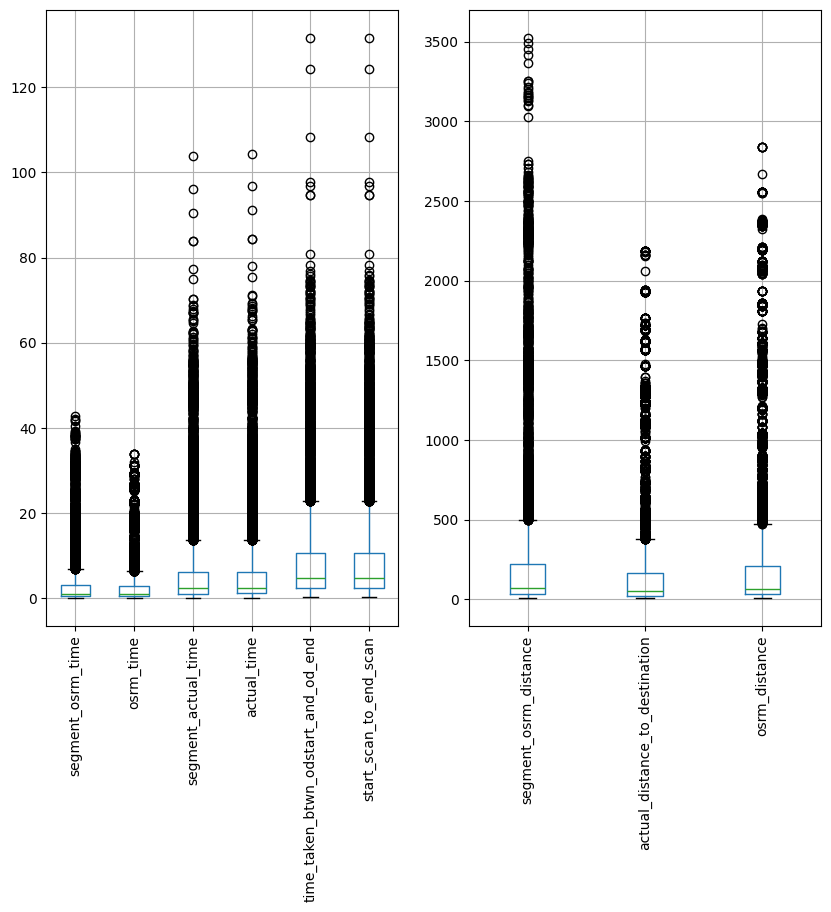

In [176]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [177]:
outlier_treatment  = trip_records.copy()

In [178]:
outlier_treatment_num = outlier_treatment[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
        'segment_osrm_distance', 'actual_distance_to_destination',
        'osrm_distance']]

# Treating Outliers

In [179]:
trip_records_without_outliers = trip_records.loc[outlier_treatment_num[(np.abs(stats.zscore(outlier_treatment_num)) < 3).all(axis=1)].index]
trip_records_without_outliers

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,FTL,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,Carting,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,Carting,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,FTL,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
5,trip-153671055416136166,Carting,Chennai,Chennai,Chennai Tamil Nadu,Chennai Tamil Nadu,Tamil Nadu,Tamil Nadu,0.383333,0.383333,1.000000,1.016667,3.174797,3.150000,28.0647,24.597048,28.0647,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,Carting,Chandigarh,Zirakpur Chandigarh,Chandigarh Punjab Chandigarh Chandigarh,Zirakpur Punjab Chandigarh Punjab,Punjab Chandigarh,Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,Carting,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,Carting,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,Carting,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tirunelveli Tamil Nadu Eral Tamil Nadu Tirchch...,Eral Tamil Nadu Tirchchndr Tamil Nadu Thisayan...,Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


# Processing Data for One hot encoding :
## merging locations details into one columns . and re categorise the data as per highest trips having location as top category

In [180]:
trip_records_without_outliers["destination_source_locations"] = trip_records_without_outliers["source_city_state"]+" "+trip_records_without_outliers["destination_city_state"]
trip_records_without_outliers.drop(["source_city_state","destination_city_state"],axis = 1,inplace=True)

In [181]:
sc_dc = trip_records_without_outliers.groupby(["destination_source_locations"])["trip_uuid"].nunique().sort_values(ascending= False).reset_index()

In [182]:
def get_cat(H):
    if 0 <= H <= 50:
        return "Category 7"
    elif 51 <= H <= 100:
        return "Category 6"
    elif 101 <= H <= 200:
        return "Category 5"
    elif 201 <= H <= 300:
        return "Category 4"
    elif 301 <= H <= 400:
        return "Category 3"
    elif 401 <= H <= 500:
        return "Category 2"
    else:
        return "Category 1"

In [183]:
sc_dc["city"]  = pd.Series(map(get_cat,sc_dc["trip_uuid"]))
trip_records_for_encoding = sc_dc.merge(trip_records_without_outliers,
            on="destination_source_locations")
trip_records_for_encoding.drop(["destination_source_locations","trip_uuid_x"],axis = 1,inplace=True)
trip_records_for_encoding.drop(["trip_uuid_y"],axis = 1,inplace=True)
# trip_records_for_encoding.sample(15)
encoded_data = pd.get_dummies(trip_records_for_encoding,
             columns=["route_type","city"] )
encoded_data

,source_city,destination_city,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,...,route_schedule_uuid,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
0,Bengaluru,Bengaluru,Karnataka,Karnataka,1.383333,0.950000,3.183333,3.233333,4.407028,4.400000,...,thanos::sroute:09b4c49e-0e89-40b6-99b3-e671400...,True,False,True,False,False,False,False,False,False
1,Bengaluru,Bengaluru,Karnataka,Karnataka,1.150000,0.883333,2.666667,2.700000,4.063014,4.050000,...,thanos::sroute:500aa87c-3d54-4159-a296-0b93c15...,True,False,True,False,False,False,False,False,False
2,Bengaluru,Bengaluru,Karnataka,Karnataka,1.183333,0.966667,3.316667,3.333333,4.076829,4.066667,...,thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...,True,False,True,False,False,False,False,False,False
3,Bengaluru,Bengaluru,Karnataka,Karnataka,0.700000,0.733333,1.316667,1.316667,4.915934,4.900000,...,thanos::sroute:5ffb9921-f943-446e-8796-0b06aa2...,True,False,True,False,False,False,False,False,False
4,Bengaluru,Bengaluru,Karnataka,Karnataka,0.783333,0.666667,1.750000,1.766667,3.248617,3.233333,...,thanos::sroute:39928fa7-4ce7-4b78-8e00-c56e31d...,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,Ajmer Badnaur Kekri Nasirabad,Bilara Bijainagar Nasirabad Ajmer,Rajasthan,Rajasthan,3.600000,3.666667,10.016667,10.066667,12.510811,12.483333,...,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,False,True,False,False,False,False,False,False,True
14156,Ajmer Asind Bijainagar Kekri Nasirabad,Bilara Bijainagar Kekri Nasirabad Ajmer,Rajasthan,Rajasthan,5.466667,4.833333,9.366667,9.400000,14.153349,14.116667,...,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,False,True,False,False,False,False,False,False,True
14157,Durgapur Barjora Bishnupur,Barjora Bankura Durgapur,West Bengal,West Bengal,1.900000,1.950000,3.650000,3.683333,4.622288,4.600000,...,thanos::sroute:4809869c-a9ef-4bf0-a42a-5e72207...,True,False,False,False,False,False,False,False,True
14158,Durgapur Barjora,Barjora Bankura,West Bengal,West Bengal,0.716667,0.750000,1.183333,1.216667,2.262950,2.250000,...,thanos::sroute:95ae97e9-3f88-427b-861d-1df152f...,True,False,False,False,False,False,False,False,True


# Column Standardization

In [184]:
['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan' ,'segment_osrm_distance', 'actual_distance_to_destination','osrm_distance' ]

['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.394178,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.445632,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.443566,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.318061,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.567441,-0.566761,-0.549293,-0.536356,-0.565995


In [187]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(encoded_data[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.069369,0.059302,0.098113,0.098719,0.098792,0.098811,0.046420,0.031804,0.036747
1,0.056757,0.054651,0.081402,0.081644,0.090329,0.090201,0.034665,0.018854,0.028743
2,0.058559,0.060465,0.102426,0.101921,0.090669,0.090611,0.039132,0.031718,0.044799
3,0.032432,0.044186,0.037736,0.037353,0.111311,0.111111,0.022697,0.022551,0.027493
4,0.036937,0.039535,0.051752,0.051761,0.070296,0.070111,0.020957,0.019694,0.022047


In [188]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.394178,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.445632,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.443566,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.318061,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.567441,-0.566761,-0.549293,-0.536356,-0.565995
...,...,...,...,...,...,...,...,...,...
14155,0.592065,0.781592,1.159358,1.155816,0.817902,0.819192,0.650499,0.672585,0.761243
14156,1.317284,1.293183,1.028130,1.022093,1.063576,1.063919,1.182419,0.984443,1.207038
14157,-0.068402,0.028823,-0.126010,-0.124580,-0.361982,-0.361989,-0.068651,-0.096314,-0.019710
14158,-0.528139,-0.497384,-0.624006,-0.619355,-0.714867,-0.714096,-0.514795,-0.459846,-0.507220


In [189]:
one_hot_encoded_data = encoded_data[["route_type_Carting","route_type_FTL","city_Category 1",
 "city_Category 2","city_Category 3","city_Category 4",
 "city_Category 5","city_Category 6","city_Category 7"]]

In [190]:
Standardized_Data = pd.concat([std_data,one_hot_encoded_data],axis = 1)

In [191]:
Min_Max_Scaled_Data = pd.concat([MinMax_data,one_hot_encoded_data],axis = 1)

In [192]:
Standardized_Data.sample(5)


,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
12757,0.941725,0.847368,0.711835,0.717874,0.918885,0.921578,0.834761,0.811678,0.826651,False,True,False,False,False,False,False,False,True
1618,-0.683544,-0.680095,-0.708127,-0.706275,-0.540732,-0.539291,-0.618540,-0.593882,-0.620584,True,False,False,True,False,False,False,False,False
447,-0.437487,-0.409683,-0.243779,-0.241588,-0.494621,-0.491844,-0.455870,-0.458197,-0.477727,True,False,True,False,False,False,False,False,False
13953,0.352484,-0.000410,-0.001511,0.002456,0.774354,0.776740,0.216568,0.028669,0.012212,True,False,False,False,False,False,False,False,True
6078,-0.702969,-0.709329,-0.408656,-0.412085,-0.209820,-0.207162,-0.678376,-0.659891,-0.687340,True,False,False,False,False,False,False,False,True


In [193]:
Min_Max_Scaled_Data.sample(5)


,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
9094,0.045045,0.060465,0.566577,0.561900,0.446024,0.445674,0.051697,0.057390,0.062202,True,False,False,False,False,False,False,False,True
12853,0.428829,0.511628,0.415094,0.414088,0.457278,0.455515,0.422167,0.487051,0.489922,False,True,False,False,False,False,False,False,True
5868,0.071171,0.086047,0.087332,0.087513,0.139208,0.138991,0.054560,0.052610,0.058395,True,False,False,False,False,False,False,False,True
4193,0.024324,0.030233,0.025337,0.025080,0.033885,0.034030,0.015319,0.007313,0.015298,True,False,False,False,False,False,True,False,False
11166,0.296396,0.355814,0.293801,0.294557,0.370198,0.370234,0.325023,0.342029,0.354996,False,True,False,False,False,False,False,False,True


# Route analysis :

In [194]:
A = data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]
C = data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]
D = data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]
F = data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]
G = trip_records.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = trip_records["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]
I = data.groupby("route_schedule_uuid")[["source_city",
                                         "destination_city"]].nunique().sort_values(by="source_city",
                                                                                     ascending=False).reset_index()
I.columns = ["route_schedule_uuid","#source_cities"
             ,"#destination_cities"]

In [195]:
route_records = I.merge(H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer")

In [196]:
route_records.isna().sum()

,0
route_schedule_uuid,0
#source_cities,0
#destination_cities,0
Number_of_Trips,0
Average_Actual_distance_to_destination,0
#source_states,0
#destination_states,0
destination_states,0
source_states,0
source_cities,0


In [197]:
route_records.dropna(inplace=True)

In [198]:

route_records["route_type"] = route_records["route_type"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_cities"] = route_records["source_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_cities"] = route_records["destination_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_states"] = route_records["source_states"].astype("str").str.strip("[]").str.replace("'","")

route_records["destination_states"] = route_records["destination_states"].astype("str").str.strip("[]").str.replace("'","")

In [199]:
route_records

,route_schedule_uuid,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df...,2,2,24,22.777751,1,1,Maharashtra,Maharashtra,Bhiwandi Mumbai,Carting,Mumbai Bhiwandi
1,thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3...,1,1,9,29.857170,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru
2,thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b...,1,1,4,59.574924,1,1,Bihar,Bihar,Naugchia,FTL,Khagaria
3,thanos::sroute:00b294b8-d2c3-4bca-a3be-684f462...,5,5,8,139.651777,1,1,West Bengal,West Bengal,Baharampur Katwa Chapra Nakashipara Plassey,Carting,Katwa Chapra Nakashipara Plassey Baharampur
4,thanos::sroute:01164881-301e-45f8-bacd-ee21c37...,3,4,15,103.783706,1,1,West Bengal,West Bengal,Kharagpur ChandroknaRD AmaDubi,FTL,Jhargram Kharagpur ChandroknaRD AmaDubi
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,1,1,16,101.026633,1,1,Maharashtra,Maharashtra,Bhiwandi,FTL,Pune
1500,thanos::sroute:ff6d6662-580b-43c3-810c-ba30270...,2,2,16,147.704874,2,1,Punjab,Road Punjab Punjab,Jalandhar Ludhiana,Carting,Chandigarh Ludhiana
1501,thanos::sroute:ff9b1c17-a70d-412a-acd1-5ab51d8...,3,3,1,1038.281992,2,2,Andhra Pradesh Telangana,Telangana Andhra Pradesh,Hyderabad Rajamundry Vizag,FTL,Rajamundry Visakhapatnam Hyderabad
1502,thanos::sroute:ffaf85f1-2f23-4367-aef7-c580448...,1,1,13,87.755248,1,1,Punjab,Punjab,Ludhiana,FTL,Chandigarh


In [200]:
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]
route_records.drop(["route_schedule_uuid"],axis = 1,inplace=True)
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column)
route_records["SouceToDestination_city"] = route_records["source_cities"].str.split(" ").apply(lambda x:x[0]) +" TO " +route_records["destination_cities"].str.split(" ").apply(lambda x:x[-1])
first_column = route_records.pop('SouceToDestination_city')
route_records.insert(0, 'SouceToDestination_city', first_column)
route_records

,SouceToDestination_city,ROUTE,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,Bhiwandi TO Bhiwandi,Bhiwandi Mumbai -- Mumbai Bhiwandi,2,2,24,22.777751,1,1,Maharashtra,Maharashtra,Bhiwandi Mumbai,Carting,Mumbai Bhiwandi
1,Bengaluru TO Bengaluru,Bengaluru -- Bengaluru,1,1,9,29.857170,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru
2,Naugchia TO Khagaria,Naugchia -- Khagaria,1,1,4,59.574924,1,1,Bihar,Bihar,Naugchia,FTL,Khagaria
3,Baharampur TO Baharampur,Baharampur Katwa Chapra Nakashipara Plassey --...,5,5,8,139.651777,1,1,West Bengal,West Bengal,Baharampur Katwa Chapra Nakashipara Plassey,Carting,Katwa Chapra Nakashipara Plassey Baharampur
4,Kharagpur TO AmaDubi,Kharagpur ChandroknaRD AmaDubi -- Jhargram Kha...,3,4,15,103.783706,1,1,West Bengal,West Bengal,Kharagpur ChandroknaRD AmaDubi,FTL,Jhargram Kharagpur ChandroknaRD AmaDubi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Bhiwandi TO Pune,Bhiwandi -- Pune,1,1,16,101.026633,1,1,Maharashtra,Maharashtra,Bhiwandi,FTL,Pune
1500,Jalandhar TO Ludhiana,Jalandhar Ludhiana -- Chandigarh Ludhiana,2,2,16,147.704874,2,1,Punjab,Road Punjab Punjab,Jalandhar Ludhiana,Carting,Chandigarh Ludhiana
1501,Hyderabad TO Hyderabad,Hyderabad Rajamundry Vizag -- Rajamundry Visak...,3,3,1,1038.281992,2,2,Andhra Pradesh Telangana,Telangana Andhra Pradesh,Hyderabad Rajamundry Vizag,FTL,Rajamundry Visakhapatnam Hyderabad
1502,Ludhiana TO Chandigarh,Ludhiana -- Chandigarh,1,1,13,87.755248,1,1,Punjab,Punjab,Ludhiana,FTL,Chandigarh


# Exploratory Data Analysis : ( getting some insights from preprocessed data ) :

## Busiest Route Analysis :
### Number of Trips between cities , sorted highest to lowest
### Top 20 source and destination cities wihc have high freqency of trips in between .

In [201]:
Number_of_trips_between_cities = data.groupby(["source_city_state",
                                               "destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(25)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
8,Chennai Tamil Nadu,Chennai Tamil Nadu,205
9,MAA Tamil Nadu,Chennai Tamil Nadu,204


- **`From above table, we can observe that Mumbai Maharashtra ,Delhi ,Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana,Chennai Tamil Nadu,Ahmedabad Gujarat,Pune Maharashtra,Chandigarh Chandigarh and Kolkata West Bengal are some cities have higest amount of trips happening states with in the city :`**

In [202]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"] != Number_of_trips_between_cities["destination_city_state"]].head(25)

,source_city_state,destination_city_state,trip_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
9,MAA Tamil Nadu,Chennai Tamil Nadu,204
10,Chennai Tamil Nadu,MAA Tamil Nadu,141
11,Bengaluru Karnataka,HBR Karnataka,133
13,Pune Maharashtra,PNQ Maharashtra,122
16,Pune Maharashtra,Bhiwandi Maharashtra,107


**`If we talk about , not having equal source and destination states , source and destination cities having higest number of trips in between are :`**

   - delhi to gurgao
   - Gurgaon,Haryana TO Bengaluru,Karnataka
   - Bhiwandi/Mumbai,Maharashtra TO Pune Maharashtra
   - Sonipat TO	Gurgaon,Haryana

      - it is also been observed that lots of deliveries are happening to airpots
      - like : Chennai to MAA chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to	CCU West Bengal Kolkata International Airport , Bengluru to BLR-Bengaluru Internation Airport etc.

In [203]:

route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by="Number_of_Trips",ascending=False).head(25)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
910,LowerParel -- Mumbai,53,16.428868,1,1
809,Mumbai -- Bhiwandi,46,20.199445,1,1
1133,Gurgaon -- Gurgaon,43,29.740842,1,1
1157,Jaipur -- Ambabadi Jaipur,41,15.348495,1,2
514,Noida -- Del,40,10.882902,1,1
315,Hyderabad -- Hyderabad,39,35.695641,1,1
505,Mumbai -- Mumbai,37,13.882863,1,1
1042,Mumbai -- Mumbai,36,17.526251,1,1
980,Bhiwandi -- Mumbai,35,21.241534,1,1
1471,Mumbai -- Mumbai,34,15.906614,1,1


# Top Routes having Maximum Number of Trips between/within the source and destinations .

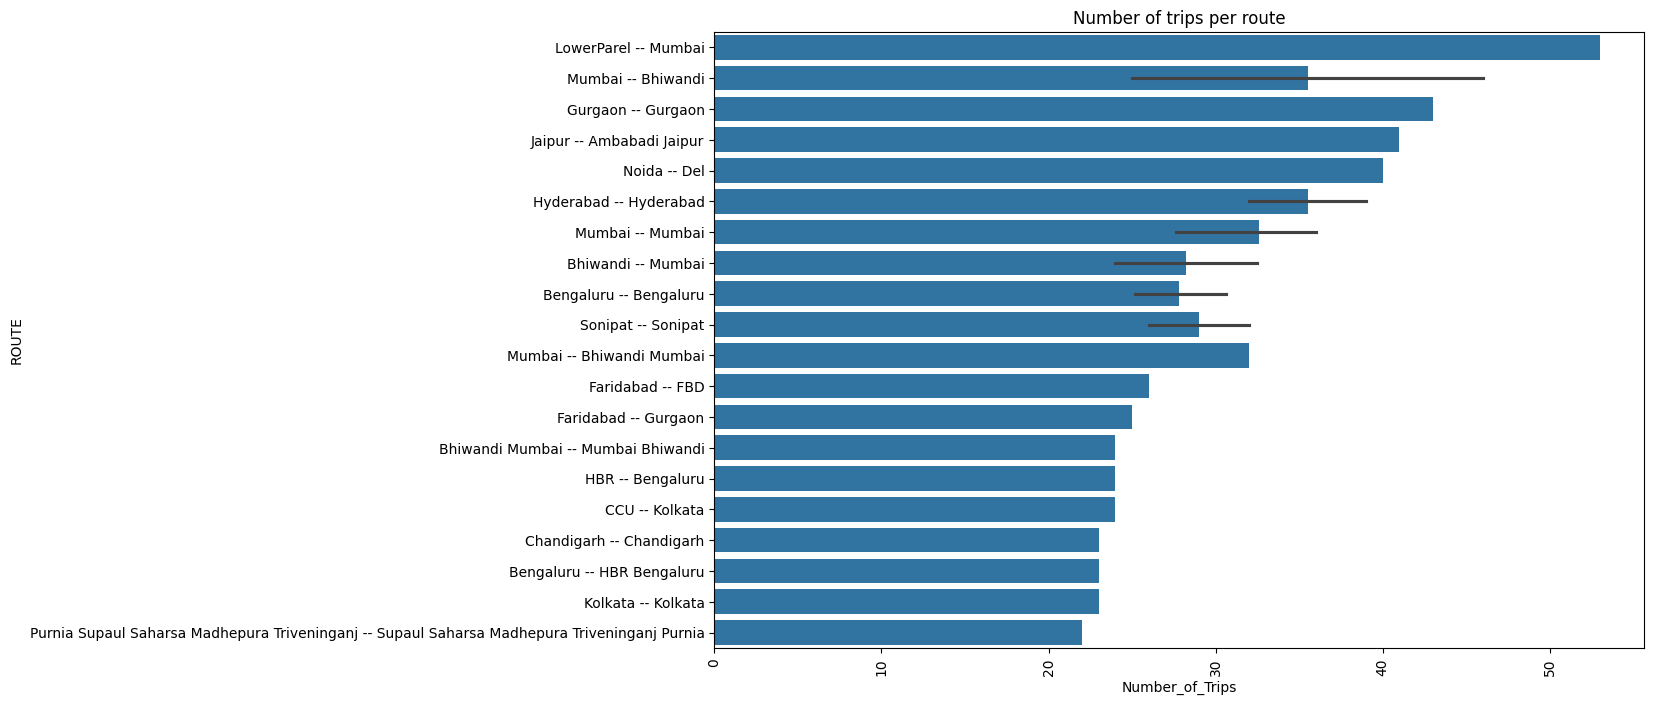

In [204]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Number_of_Trips",
               ]].sort_values(by="Number_of_Trips",ascending=False).head(35)
sns.barplot(y = X["ROUTE"],
           x= X["Number_of_Trips"])
plt.title("Number of trips per route")
plt.xticks(rotation = 90)
plt.show()

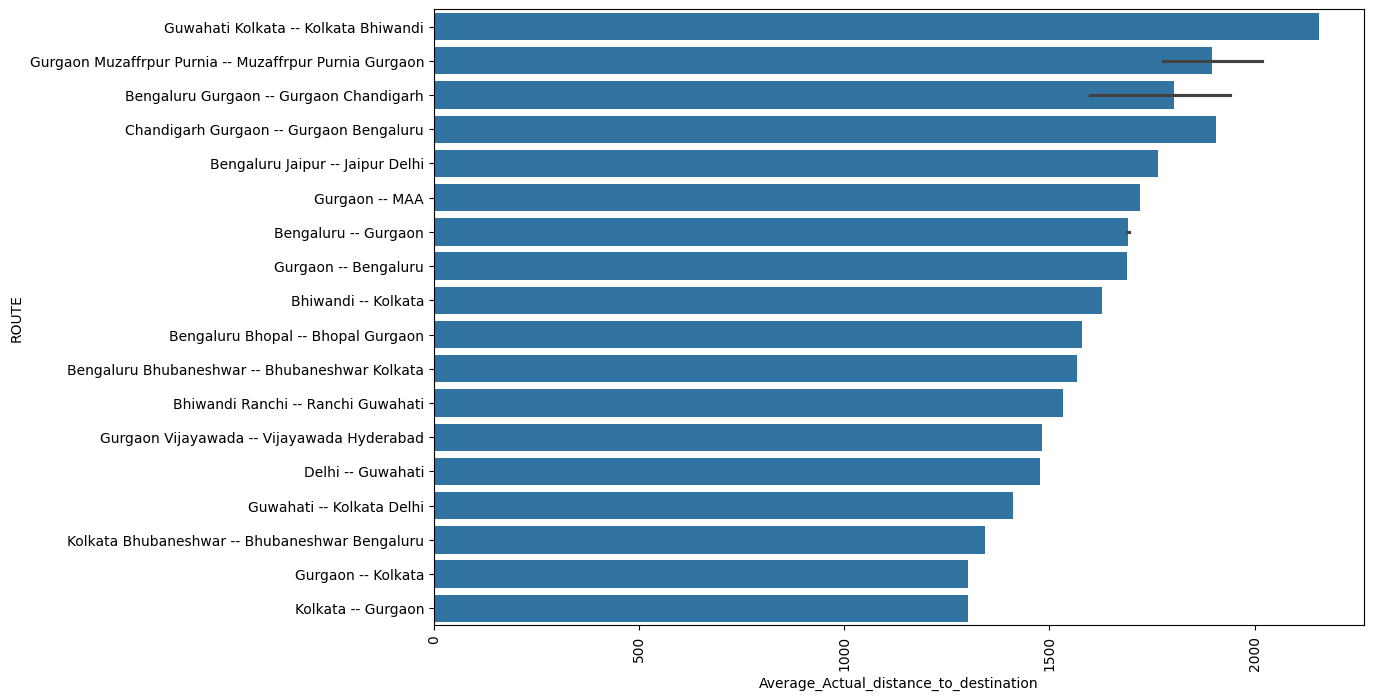

In [205]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Average_Actual_distance_to_destination",
               ]].sort_values(by="Average_Actual_distance_to_destination",ascending=False).head(25)
sns.barplot(y = X["ROUTE"],
           x = X["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

- From above Bar chart , and table , we can observe that higest trips are happening is with in the particular cities.
- in terms of average distnace between destinations , we can observe Guwahati to Mumbai , Benglore to Chandigarh ,Benglore to Delhi , Benglore to Gurgaon are the longest routes .

# Busiest and Longest Routes :

In [206]:
Busiest_and_Longest_Routes  = route_records[(route_records["Average_Actual_distance_to_destination"] > route_records["Average_Actual_distance_to_destination"].quantile(0.75))
              & (route_records["Number_of_Trips"] > route_records["Number_of_Trips"].quantile(0.75))].sort_values(by="Average_Actual_distance_to_destination"
                                                                                                                  ,ascending=False)
Busiest_and_Longest_Routes_top25 = Busiest_and_Longest_Routes[["source_cities",
                                                               "destination_cities",
                                                               "Number_of_Trips",
                                                               "Average_Actual_distance_to_destination"]].head(25)
Busiest_and_Longest_Routes_top25

,source_cities,destination_cities,Number_of_Trips,Average_Actual_distance_to_destination
338,Chandigarh Gurgaon,Gurgaon Bengaluru,22,1905.766051
1260,Gurgaon,Bengaluru,21,1689.873158
25,Gurgaon,Bengaluru,21,1689.791894
913,Bengaluru Bhubaneshwar,Bhubaneshwar Kolkata,18,1567.577507
1075,Guwahati,Kolkata Delhi,18,1411.208424
213,Kolkata Bhubaneshwar,Bhubaneshwar Bengaluru,16,1342.143081
1081,Gurgaon,Kolkata,16,1300.572161
124,Delhi Gurgaon,Gurgaon Kolkata,18,1263.113211
249,Gurgaon,Hyderabad,16,1236.572072
1293,Chandigarh Gurgaon,Gurgaon Bhiwandi,20,1170.817927


**Above Table shows the souce to destination city routes having largest numbers of trip happening having large distnaces :
which are :**
- Chandigarh TO Bengaluru
- Gurgaon TO Bengaluru
- Bengaluru TO Kolkata
- Guwahati TO Delhi
- Delhi  TO Kolkata
- Chandigarh TO Gurgaon
- Gurgaon TO Hydrabad
- Benglore TO Ahmedabad
- Surat TO Delhi
- Gurgaon TO Ahmedabad**

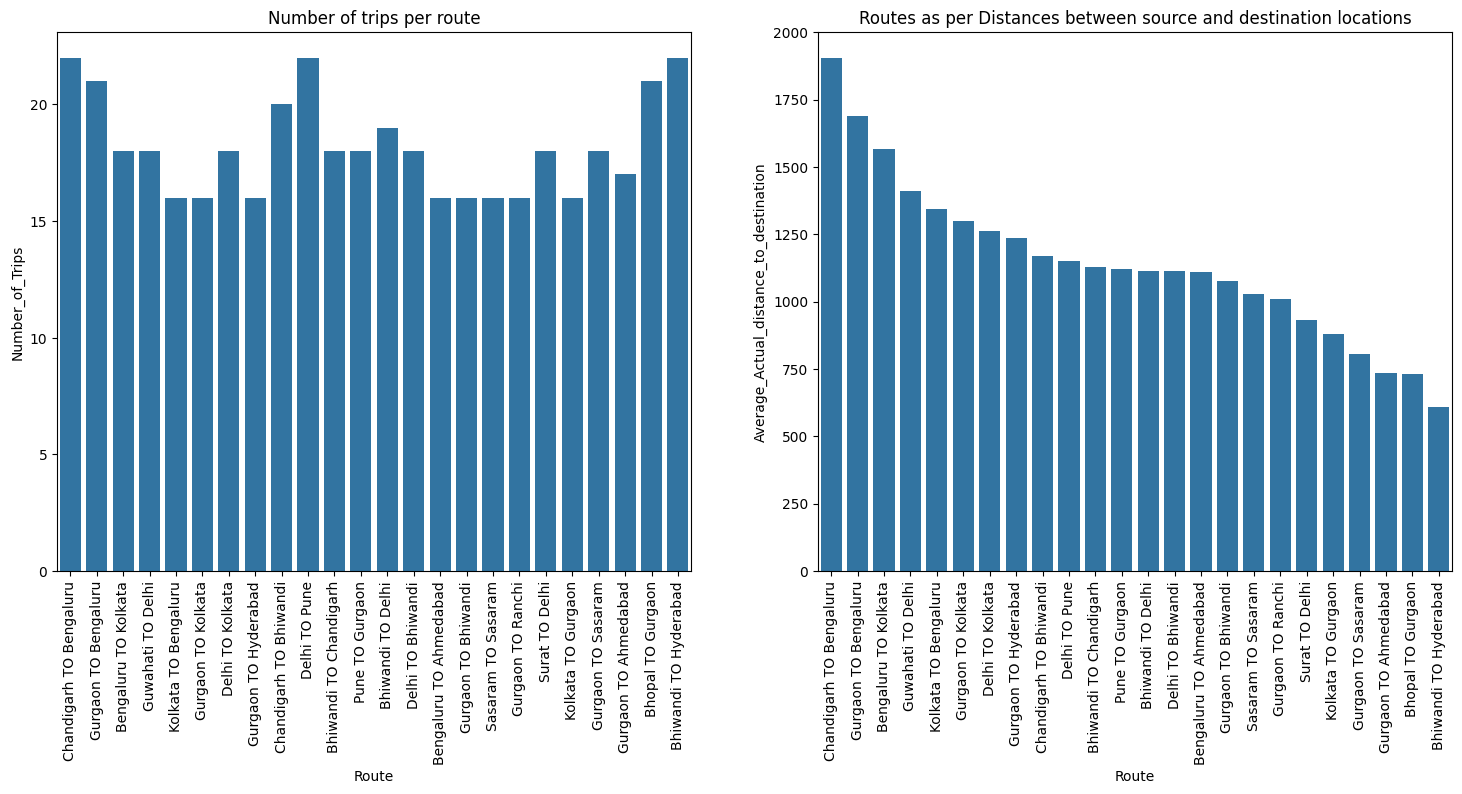

In [207]:
Busiest_and_Longest_Routes_top25["Route"] = Busiest_and_Longest_Routes_top25["source_cities"].str.split(" ").apply(lambda x:x[0]) + " TO " + Busiest_and_Longest_Routes_top25["destination_cities"].str.split(" ").apply(lambda x:x[-1])
Busiest_and_Longest_Routes_top25.drop(["source_cities","destination_cities"],axis = 1,inplace=True)
plt.figure(figsize=(18,7))

plt.subplot(121)
plt.title("Number of trips per route")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y = Busiest_and_Longest_Routes_top25["Number_of_Trips"])
plt.xticks(rotation = 90)
plt.subplot(122)
plt.title("Routes as per Distances between source and destination locations")
sns.barplot(x=Busiest_and_Longest_Routes_top25["Route"],
           y= Busiest_and_Longest_Routes_top25["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

# Routes : passing through maxinum number of cities :

In [208]:
route_records[["SouceToDestination_city","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by=["#source_cities",
                                                       "#destination_cities",
                                                       "Number_of_Trips"]
                                                   ,ascending=False).head(25)

,SouceToDestination_city,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
1192,Guwahati TO LakhimpurN,14,281.596486,13,11
990,Jaipur TO Tarnau,20,351.611796,10,10
408,Guwahati TO Tura,12,332.602225,10,10
1447,Mangalore TO Udupi,9,195.257193,9,9
1367,Ajmer TO Raipur,20,178.737233,9,8
1483,Mainpuri TO Tilhar,12,207.247057,8,8
1451,Hassan TO Koppa,21,200.497832,7,7
296,Shrirampur TO Sangamner,20,204.509529,7,7
943,Musiri TO Tiruchi,19,219.845121,7,7
81,Dausa TO Lalsot,17,232.408310,7,7


# Top 20 Longest Route as per : average actual time taken from one city to another city :

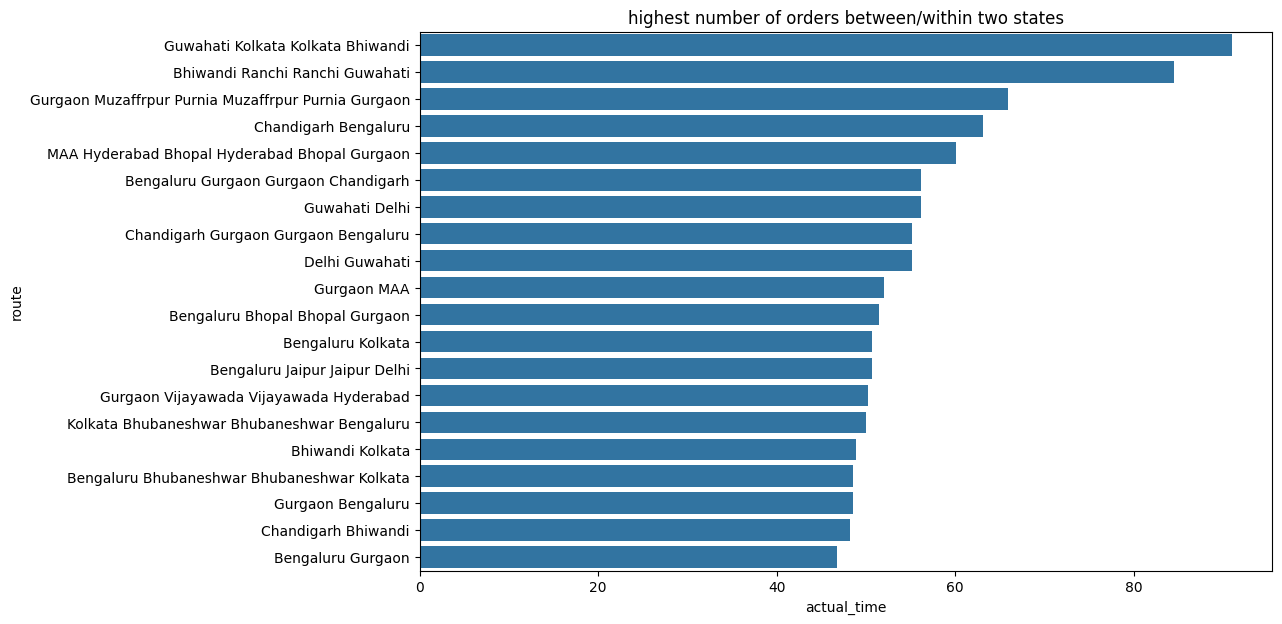

In [209]:
Longest_route_as_per_actual_trip_time = trip_records.groupby(["source_city",
                      "destination_city"])["actual_time"].mean().sort_values(ascending=False).head(20).reset_index()
Longest_route_as_per_actual_trip_time["route"] = Longest_route_as_per_actual_trip_time["source_city"] + " " + Longest_route_as_per_actual_trip_time["destination_city"]
Longest_route_as_per_actual_trip_time.drop(["source_city",
                                            "destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_trip_time
plt.figure(figsize=(11,7))
sns.barplot(y = Longest_route_as_per_actual_trip_time["route"],
           x = Longest_route_as_per_actual_trip_time["actual_time"],)
plt.title("highest number of orders between/within two states")
plt.show()

# highest number of Trips happening between/within two states :

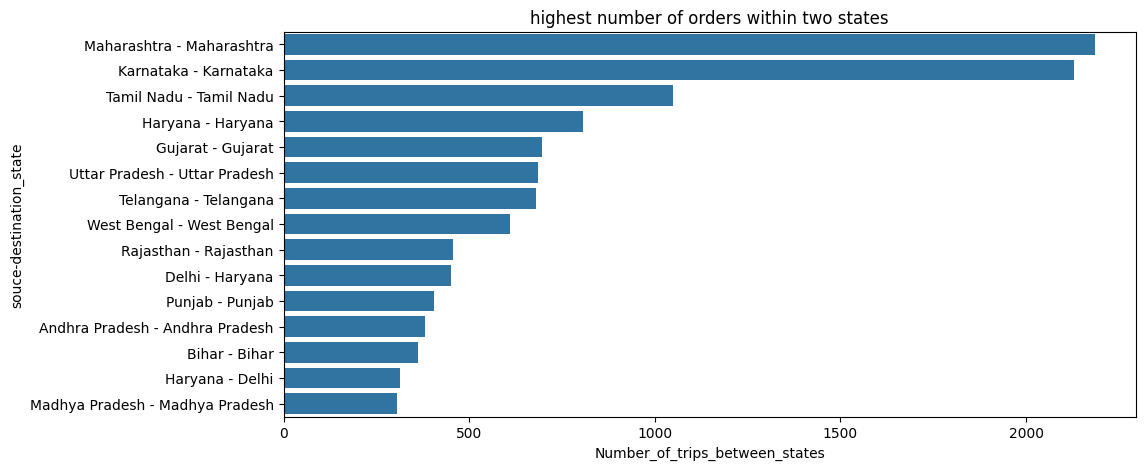

In [210]:
highest_order_between_states = data.groupby(["source_state",
                                             "destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS  = highest_order_between_states.head(15)
HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"]

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

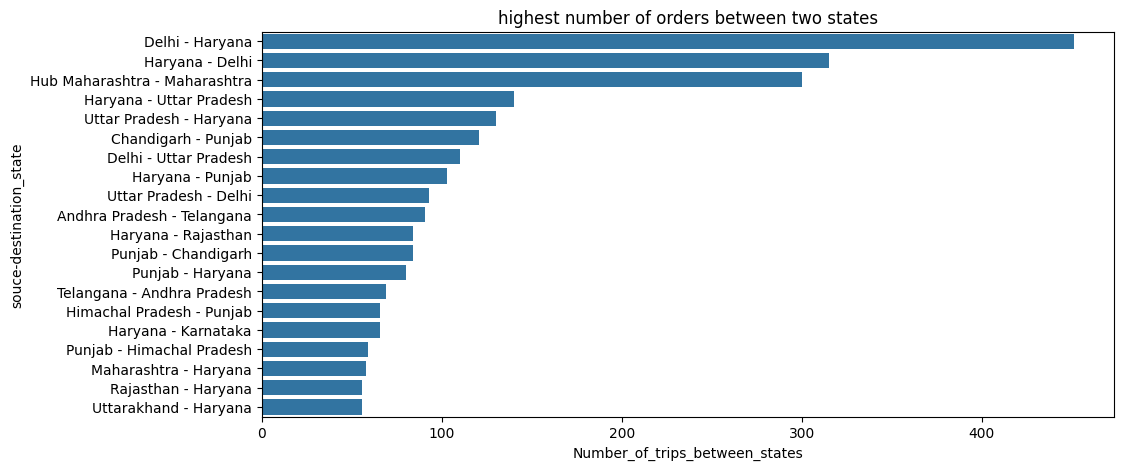

In [211]:
HOBS = data.groupby(["source_state","destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS = HOBS[HOBS["source_state"]!=HOBS["destination_state"]].head(20)

HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"]

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders between two states")
plt.show()


**`From above charts ,`**<br>
    > Delhi to Haryana is the busiest route, having more than 400 trips in between. Some of such busy routes are Haryana to Uttar Pradesh , Chandigarh to Punjab , Delhi to Uttar Pradesh .<br>
    > Within the state , Maharashtra , Karnataka, Tamil Nadu are some states having above 1000 trips.

# Top 20 warehouses with heavy traffic :

In [212]:
destination_traffic = data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

In [213]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)

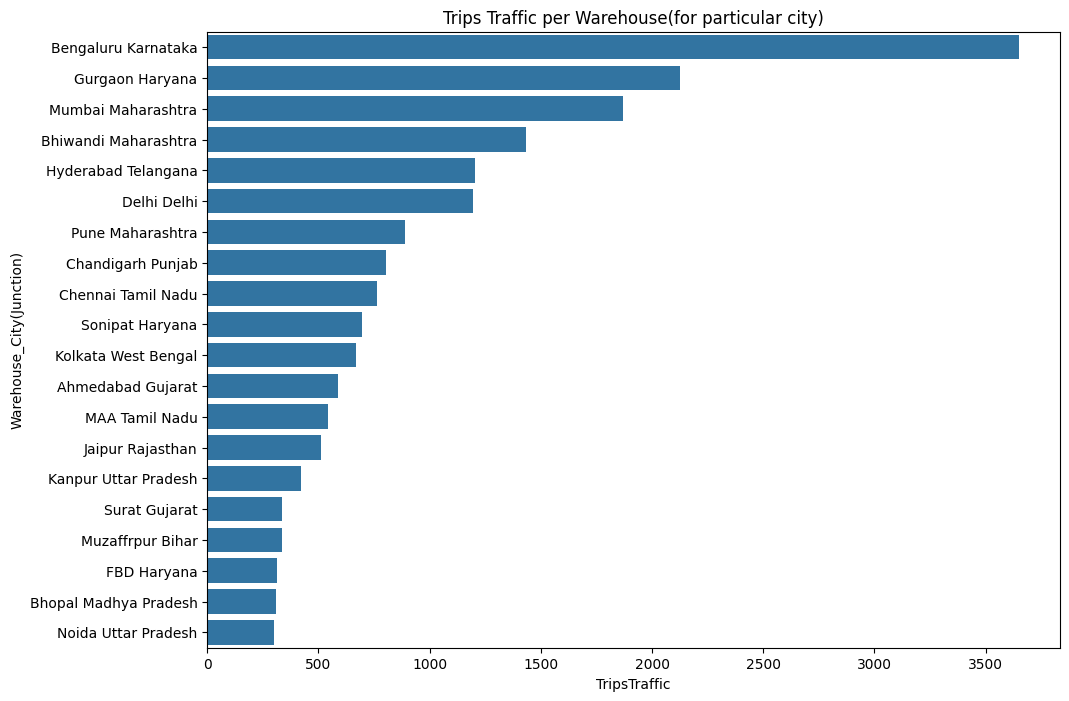

In [214]:
plt.figure(figsize=(11,8))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

**`Top 20 Busiest Warehouse (junctions) as per trips traffic at the juction : are`**
- 'Bengaluru Karnataka',
- 'Gurgaon Haryana',
- 'Mumbai Maharashtra',
- 'Bhiwandi Maharashtra',
- 'Hyderabad Telangana',
- 'Delhi Delhi',
- 'Pune Maharashtra',
- 'Chandigarh Punjab', -
- 'Chennai Tamil Nadu',
- 'Sonipat Haryana', -
- 'Kolkata West Bengal',
- 'Ahmedabad Gujarat',
- 'MAA Tamil Nadu',
- 'Jaipur Rajasthan',
- 'Kanpur Uttar Pradesh', -
- 'Surat Gujarat',
- 'Muzaffrpur Bihar',
- 'FBD Haryana',
- 'Bhopal Madhya Pradesh',
- 'Noida Uttar Pradesh'

In [215]:
trip_records.groupby(["source_state","destination_state"])["trip_uuid"].count().sort_values(ascending=False).head(15).reset_index()

,source_state,destination_state,trip_uuid
0,Maharashtra,Maharashtra,2085
1,Karnataka,Karnataka,2002
2,Tamil Nadu,Tamil Nadu,996
3,Haryana,Haryana,771
4,Telangana,Telangana,627
5,Gujarat,Gujarat,624
6,West Bengal,West Bengal,610
7,Uttar Pradesh,Uttar Pradesh,529
8,Rajasthan,Rajasthan,400
9,Delhi,Haryana,385


# Insights

- 14817 different trips happened between source to destinations during 2018 , September and October.

- 1504 delivery routes on which trips are happenig.

- we have 1508 unique source centers and 1481 unique destination centers

- From 14817 total different trips , we have 8908 (60%) of the trip-routes are Carting , which consists of small vehicles and 5909 (40%) of total trip-routes are FTL : which are Full Truck Load get to the destination sooner. as no other pickups or drop offs along the way .

## Hypothesis tests Results
    - from 2 sample t-test ,we can also conclude that

    - Average time_taken_btwn_odstart_and_od_end for population is equal to Average start_scan_to_end_scan for population.

    - population average actual_time is less than population average start_scan_to_end_scan.

    - population mean Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

    - Mean of actual time is higher than Mean of the OSRM estimated time for delivery

    - Population average for Actual Time taken to complete delivery trip and segment actual time are same.

    - Average of OSRM Time & segment-osrm-time for population is not same.

    - Population Mean osrm time is less than Population Mean segment osrm time.

    - Average of OSRM distance for population is less than average of segment OSRM distance

    - population OSRM estimated distance is higher than the actual distance from source to destination warehouse.

## EDA Results
    - we can observe that Mumbai Maharashtra ,Delhi , Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana, Chennai Tamil Nadu, Ahmedabad-Gujarat, Pune Maharashtra, Chandigarh Chandigarh and Kolkata West Bengal are some cities have higest amount of trips happening states with in the city.

    - If we talk about , not having equal source and destination states , source and destination cities having higest number of trips in between are : Delhi TO Gurgao , Gurgaon TO Bengaluru , Bhiwandi/Mumbai TO Pune Maharashtra , Sonipat TO Gurgaon,Haryana

    - It is also been observed that lots of deliveries are happening to airpots like : Chennai to MAA chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to CCU West Bengal Kolkata International Airport , Bengluru to BLR-Bengaluru International Airport etc.

    - From Bar charts , and calculated tables in analysis , we can observe that higest trips are happening is with in the particular cities, in terms of average distance between destinations , we can observe Guwahati to Mumbai , Benglore to Chandigarh ,Benglore to Delhi , Benglore to Gurgaon are the longest routes.

# Recommendations

- As per analysis, It is recommended to use Carting (small vehicles) for delivery with in the city in order to reduce the delivery time, and Heavy trucks for long distance trips or heavy load. based on this , we can optimize the delivery time as well as increase the revenue as per requirements.
- Incresing the connectivity in tier 2 and tier 3 cities along with profession tie-ups with several e-commerce giants can increase the revenue as well as the reputation on connectivity across borders.
- We can work on optimizing the scanning time on both ends which is start scanning time and end scanning time so that the delivery time can be equated to the OSRM estimated delivery time.

- Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.

- North, South and West Zones comidors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.

- From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.